<a href="https://colab.research.google.com/github/1012357482/Phishing/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carga el dataset:

In [4]:
dataset = pd.read_csv("/content/urls _pishing_F.csv", encoding='latin-1')

X = dataset.iloc[:,[3,4,5,6,7,8,9,10,11,12]].values
#X = dataset.iloc[:,[3,4]].values
y = dataset.iloc[:,13].values

dataset.head()
print(X)

[['26496' ' Host Europe GmbH ' ' US ' ... 1000.0 '76' 79]
 ['14618' ' Amazon.com ' ' US ' ... 89.0 ' nan ' 53]
 ['14618' ' Amazon.com ' ' US ' ... 89.0 ' nan ' 116]
 ...
 ['16625' ' Akamai Technologies ' ' US ' ... 5.0 ' nan ' 55]
 ['23520' ' Columbus Networks de Colombia Limitada ' ' CO ' ... 9.0
  ' nan ' 48]
 ['23520' ' Columbus Networks de Colombia Limitada ' ' CO ' ... 9.0
  ' nan ' 36]]


Tratamiento de los datos faltantes ie NaN

In [5]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
#imputer = imputer.fit(X[:,[1,4,8,9,10]])
#X[:,[1,4,8,9,10]] = imputer.transform(X[:,[1,4,8,9,10]])
imputer = imputer.fit(X[:,[0,3,7,8,9]])
X[:,[0,3,7,8,9]] = imputer.transform(X[:,[0,3,7,8,9]])

Codificación númerica de los datos cualitativos

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder() 
X[:,1] = labelencoder_X.fit_transform(X[:,1].astype(str))
X[:,2] = labelencoder_X.fit_transform(X[:,2].astype(str))
X[:,4] = labelencoder_X.fit_transform(X[:,4].astype(str))
X[:,5] = labelencoder_X.fit_transform(X[:,5].astype(str))
X[:,6] = labelencoder_X.fit_transform(X[:,6].astype(str))

Dividir el data set en conjunto de entrenamiento y conjunto de testing(cross validation )

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Aplicando el Escalado de variables

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Ajustar el clasificador en el Conjunto de entrenamiento

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Conjunto de testeo se elabora la predicción de los resultado

> Bloque con sangría



In [13]:
y_pred  = classifier.predict(X_test)
print(y_pred)


[1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0]


Se elabora la matriz de confusión: Mide el desempeño del algoritmo falsos positivos etc

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Creación curva ROC Naive Bayes

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.9488505747126436


Creación Diagrama ROC:

Sin entrenar: ROC AUC=0.500
Naive Bayews: ROC AUC=0.961


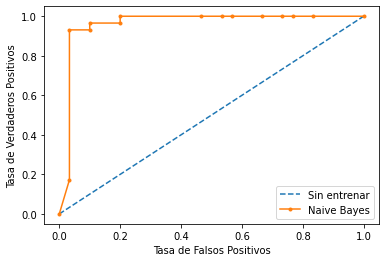

In [16]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayews: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()